# Exploratory Data Analysis (EDA) of Agricultural Market Data

In [2]:
import numpy as np 
import pandas as pd
import pickle

df = pd.read_csv('./merged_file.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711341 entries, 0 to 711340
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DDate         711341 non-null  object 
 1   AmcCode       711341 non-null  int64  
 2   AmcName       711341 non-null  object 
 3   YardCode      711341 non-null  int64  
 4   YardName      711341 non-null  object 
 5   CommCode      711341 non-null  int64  
 6   CommName      711341 non-null  object 
 7   VarityCode    711341 non-null  int64  
 8   VarityName    711341 non-null  object 
 9   Arrivals      711341 non-null  float64
 10  Minimum       711341 non-null  float64
 11  Maximum       711341 non-null  float64
 12  Model         711341 non-null  float64
 13  ProgArrivals  392920 non-null  float64
 14  Valuation     392920 non-null  float64
 15  MarketFee     392920 non-null  float64
dtypes: float64(7), int64(4), object(5)
memory usage: 86.8+ MB


In [4]:
df.describe()

,AmcCode,YardCode,CommCode,VarityCode,Arrivals,Minimum,Maximum,Model,ProgArrivals,Valuation,MarketFee
count,711341.000000,711341.000000,711341.000000,711341.000000,7.113410e+05,7.113410e+05,7.113410e+05,7.113410e+05,392920.0,392920.0,392920.0
mean,299.751195,777.740684,82.636138,125.788684,4.139143e+02,3.514749e+07,3.450563e+03,2.150867e+52,0.0,0.0,0.0
std,46.452447,651.595940,55.703066,77.769759,4.092253e+03,2.964156e+10,4.049753e+04,1.814064e+55,0.0,0.0,0.0
min,186.000000,1.000000,1.000000,1.000000,1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
25%,278.000000,6.000000,25.000000,87.000000,9.730000e+00,1.000000e+03,1.500000e+03,1.250000e+03,0.0,0.0,0.0
50%,322.000000,1080.000000,101.000000,114.000000,4.300000e+01,1.600000e+03,2.300000e+03,2.000000e+03,0.0,0.0,0.0
75%,325.000000,1330.000000,117.000000,197.000000,2.340000e+02,3.050000e+03,4.500000e+03,3.939000e+03,0.0,0.0,0.0
max,379.000000,1728.000000,271.000000,330.000000,1.743030e+06,2.500000e+13,3.346335e+07,1.530000e+58,0.0,0.0,0.0


In [5]:
df.head()

,DDate,AmcCode,AmcName,YardCode,YardName,CommCode,CommName,VarityCode,VarityName,Arrivals,Minimum,Maximum,Model,ProgArrivals,Valuation,MarketFee
0,2014-01-02 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,637.0,1310.0,1330.0,1320.0,NaN,NaN,NaN
1,2014-01-02 00:00:00+05:30,221,Jammikunta,36,Jammikunta,1,Paddy,240,Common (1001),161.0,1300.0,1310.0,1310.0,NaN,NaN,NaN
2,2014-01-03 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,287.0,1310.0,1330.0,1320.0,NaN,NaN,NaN
3,2014-01-04 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,329.0,1310.0,1330.0,1320.0,NaN,NaN,NaN
4,2014-01-06 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,149.0,1500.0,1675.0,1600.0,NaN,NaN,NaN


 ## Temporal Analysis

In [5]:
# Convert DDate to datetime
df['DDate'] = pd.to_datetime(df['DDate'])
print(f"Date range: {df['DDate'].min()} to {df['DDate'].max()}")

Date range: 2014-01-02 00:00:00+05:30 to 2024-11-30 00:00:00+05:30


In [17]:
df['Year'] = df['DDate'].dt.year
df['Month'] = df['DDate'].dt.month
df['Day'] = df['DDate'].dt.day
df['DayOfWeek'] = df['DDate'].dt.dayofweek  # Monday=0, Sunday=6

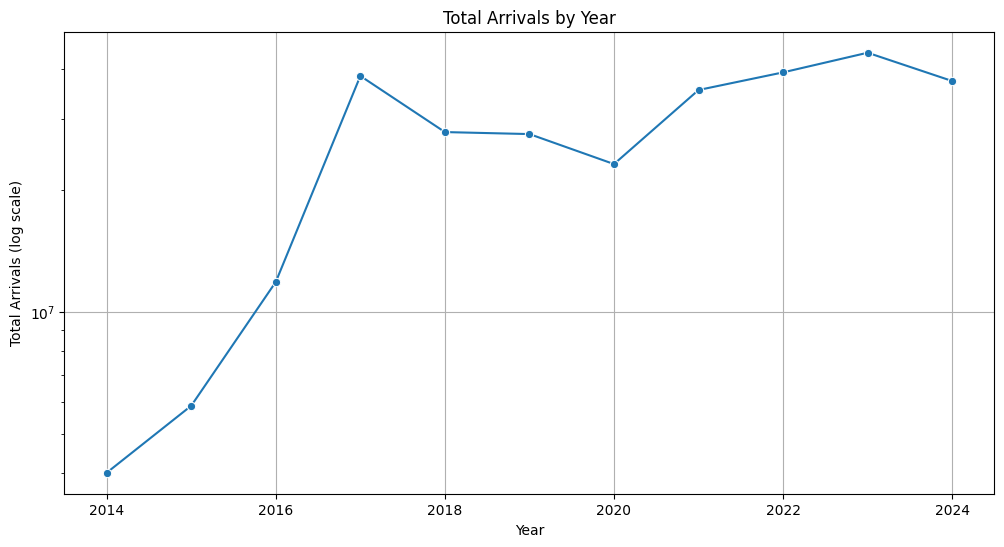

In [18]:
yearly_stats = df.groupby('Year').agg({
    'Arrivals': 'sum',
    'Minimum': 'mean',
    'Maximum': 'mean',
    'Model': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x='Year', y='Arrivals', marker='o')
plt.title('Total Arrivals by Year')
plt.ylabel('Total Arrivals (log scale)')
plt.yscale('log')  # Due to large variations
plt.grid(True)
plt.show()

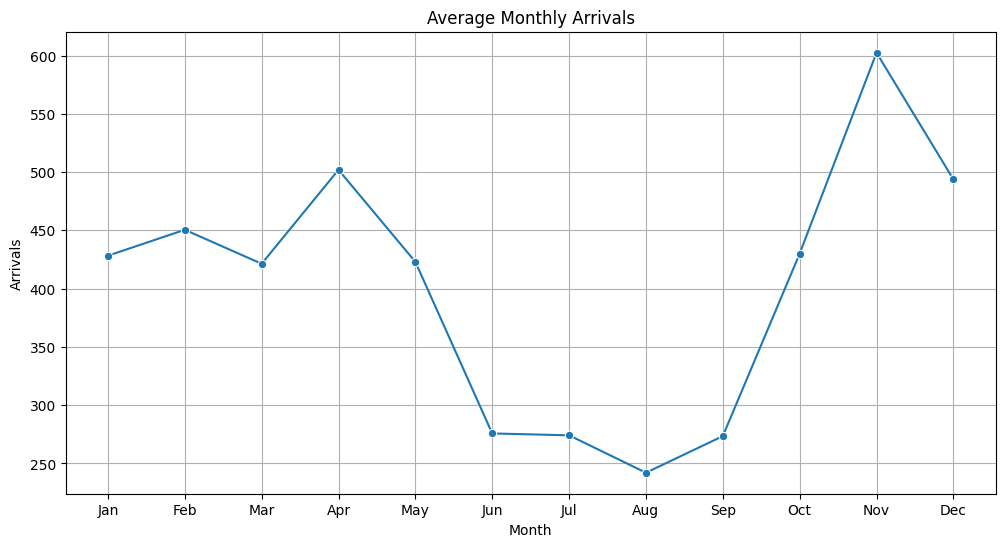

In [19]:
monthly_stats = df.groupby('Month').agg({
    'Arrivals': 'mean',
    'Minimum': 'mean',
    'Maximum': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_stats, x='Month', y='Arrivals', marker='o')
plt.title('Average Monthly Arrivals')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

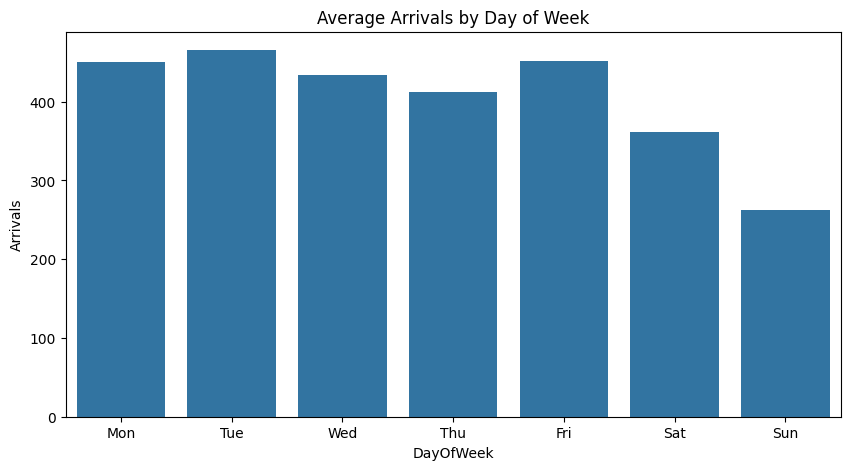

In [20]:
day_of_week_stats = df.groupby('DayOfWeek').agg({
    'Arrivals': 'mean',
    'Minimum': 'mean',
    'Maximum': 'mean'
}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=day_of_week_stats, x='DayOfWeek', y='Arrivals')
plt.title('Average Arrivals by Day of Week')
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

##  Price Spread Analysis

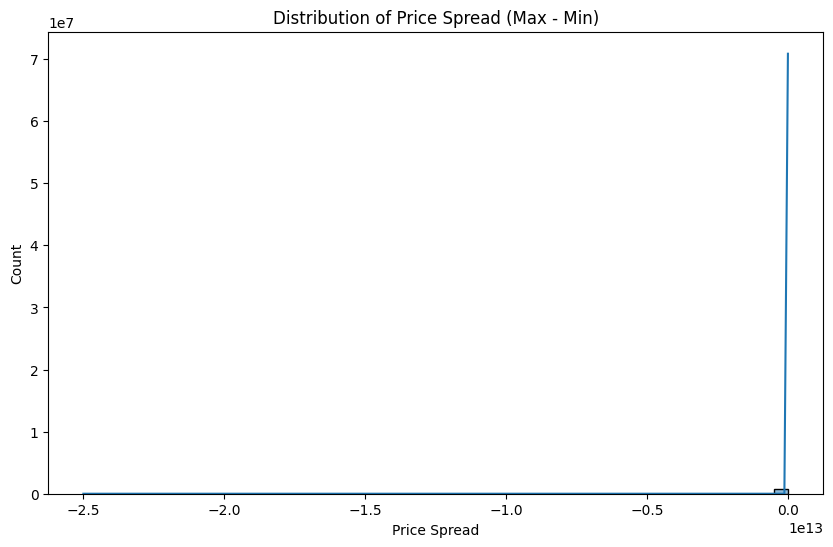

In [21]:
df['PriceSpread'] = df['Maximum'] - df['Minimum']
plt.figure(figsize=(10, 6))
sns.histplot(df['PriceSpread'].dropna(), bins=50, kde=True)
plt.title('Distribution of Price Spread (Max - Min)')
plt.xlabel('Price Spread')
plt.show()

## Commodity-Level Insights

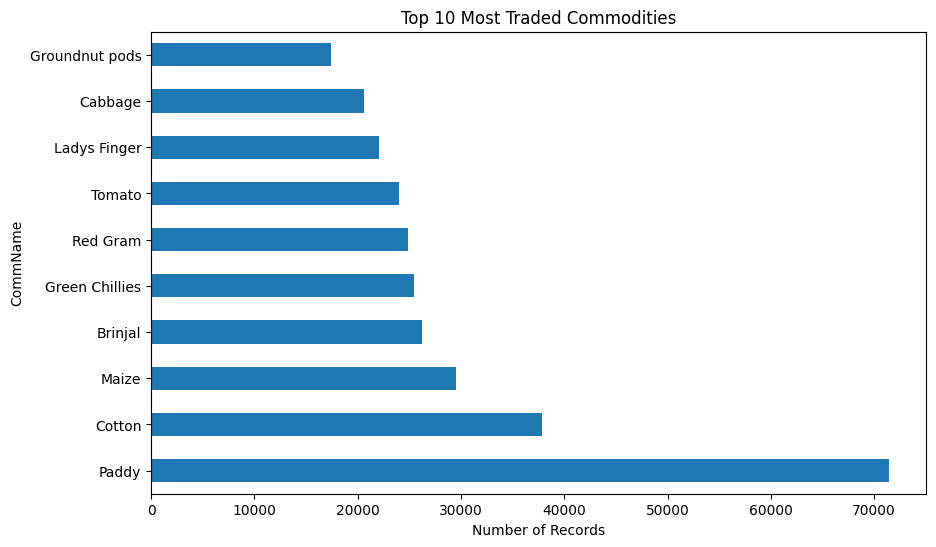

In [22]:
top_commodities = df['CommName'].value_counts().nlargest(10)
top_commodities.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Traded Commodities')
plt.xlabel('Number of Records')
plt.show()

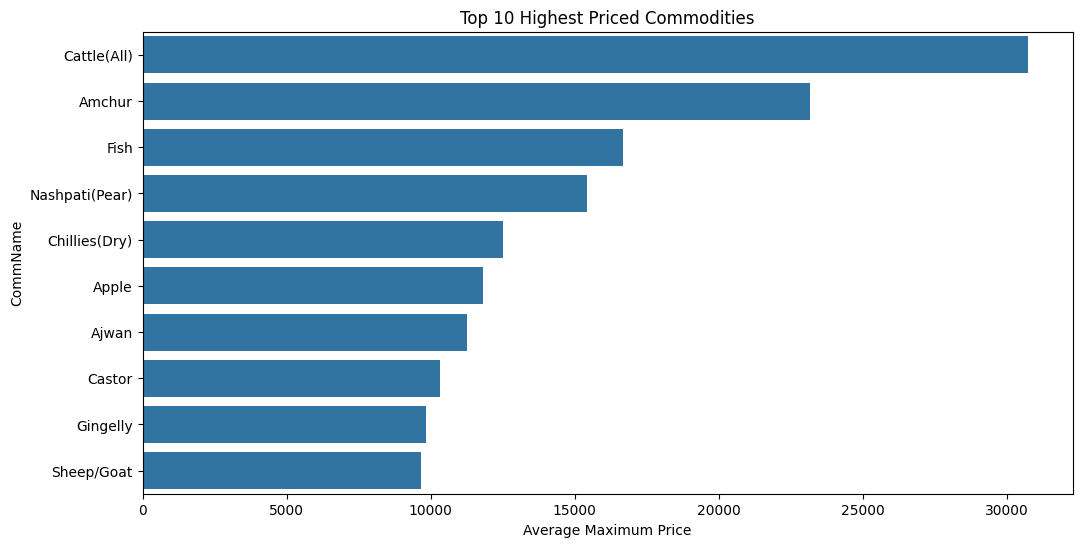

In [23]:
avg_price_by_commodity = df.groupby('CommName')['Maximum'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_commodity.head(10).values, y=avg_price_by_commodity.head(10).index)
plt.title('Top 10 Highest Priced Commodities')
plt.xlabel('Average Maximum Price')
plt.show()

## Categorical Variables Analysis

In [6]:
categorical_cols = ['AmcCode', 'AmcName', 'YardCode', 'YardName', 'CommCode', 'CommName', 'VarityCode', 'VarityName']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

AmcCode: 171 unique values
AmcName: 171 unique values
YardCode: 207 unique values
YardName: 204 unique values
CommCode: 117 unique values
CommName: 117 unique values
VarityCode: 197 unique values
VarityName: 66 unique values


## Numerical Variables Analysis

In [7]:
# Log transform for skewed variables
df['log_Arrivals'] = np.log1p(df['Arrivals'])
df['log_Minimum'] = np.log1p(df['Minimum'])
df['log_Maximum'] = np.log1p(df['Maximum'])

# Handle extreme Model values - likely data errors
df['Model'] = df['Model'].replace([np.inf, -np.inf], np.nan)
df['Model'] = df['Model'].where(df['Model'] < 1e10, np.nan)

## Price Analysis

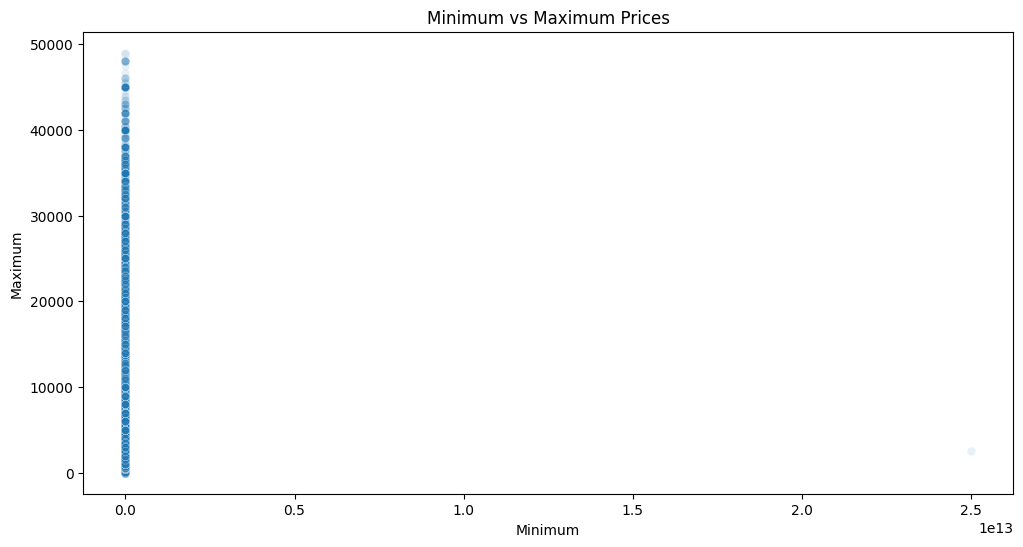

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x='Minimum', y='Maximum', data=df[df['Maximum'] < 50000], alpha=0.1)
plt.title('Minimum vs Maximum Prices')
plt.show()

## Arrivals Analysis

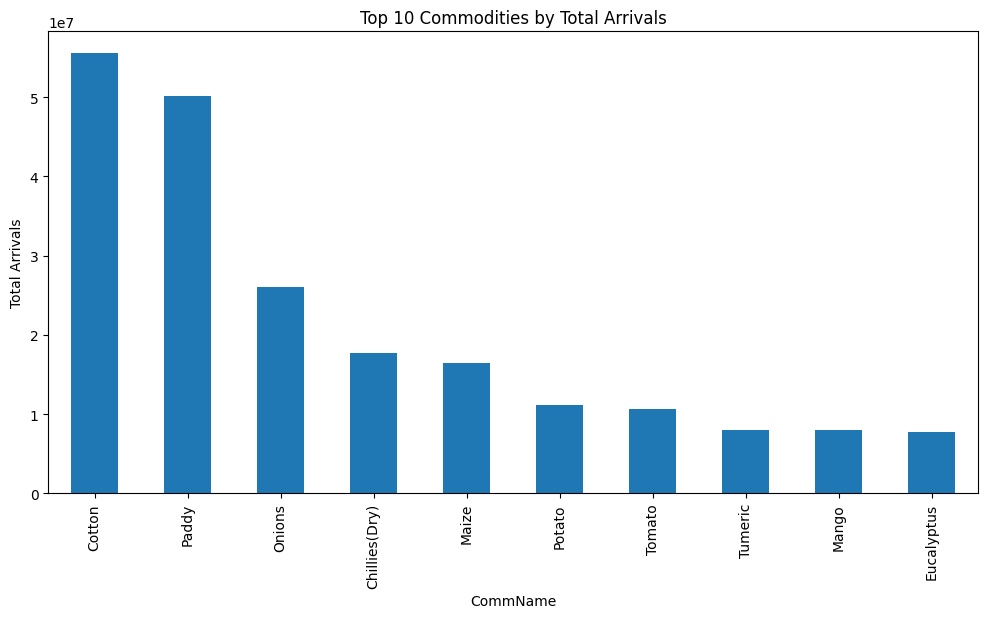

In [9]:
top_commodities = df.groupby('CommName')['Arrivals'].sum().sort_values(ascending=False).head(10)
top_commodities.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Commodities by Total Arrivals')
plt.ylabel('Total Arrivals')
plt.show()

## Market Fee Analysis

In [11]:
fee_data = df[df['MarketFee'].notna() & (df['MarketFee'] > 0)]
if len(fee_data) > 0:
    sns.displot(fee_data['MarketFee'], kde=True)
    plt.title('Distribution of Market Fees')
    plt.show()

## Geographic Patterns

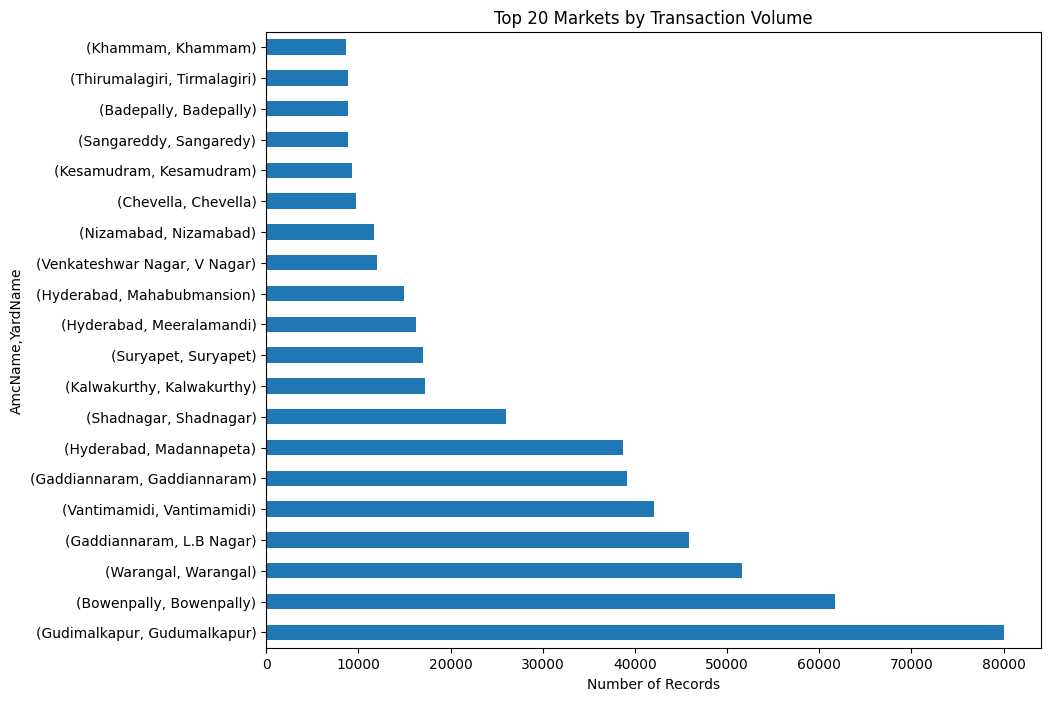

In [12]:
market_activity = df.groupby(['AmcName', 'YardName']).size().sort_values(ascending=False).head(20)
market_activity.plot(kind='barh', figsize=(10,8))
plt.title('Top 20 Markets by Transaction Volume')
plt.xlabel('Number of Records')
plt.show()

## Time Series Trends

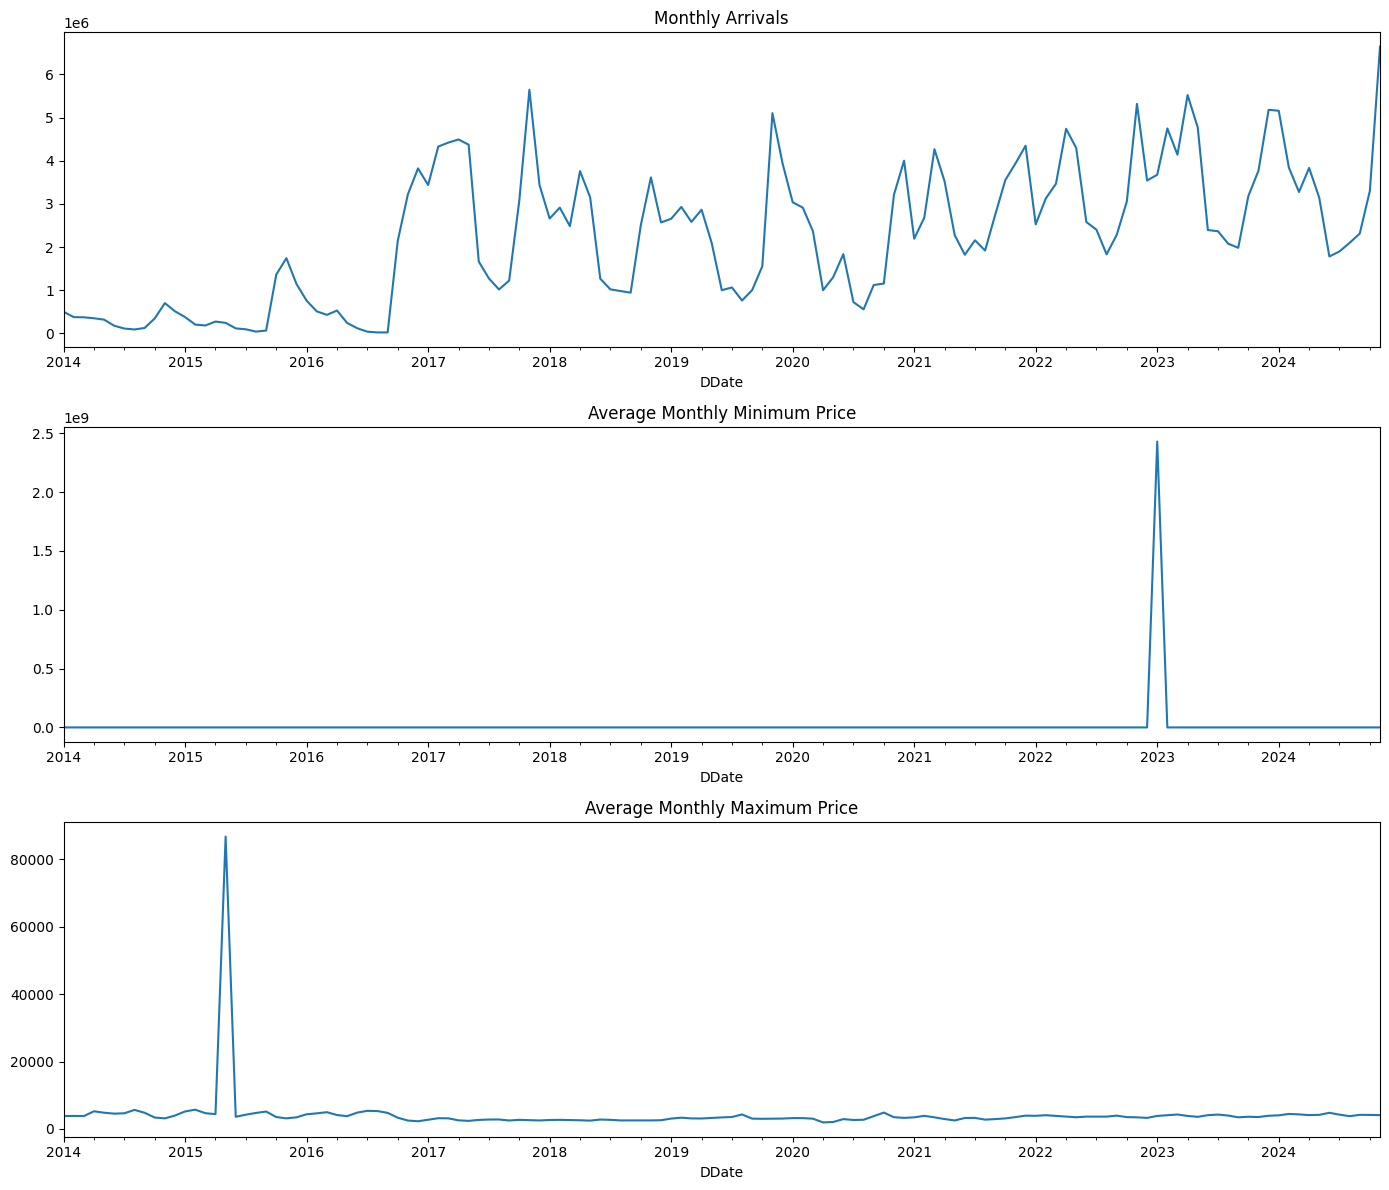

In [14]:
monthly = df.set_index('DDate').resample('ME').agg({
    'Arrivals': 'sum',
    'Minimum': 'mean',
    'Maximum': 'mean'
})

fig, axes = plt.subplots(3,1, figsize=(14,12))
monthly['Arrivals'].plot(ax=axes[0], title='Monthly Arrivals')
monthly['Minimum'].plot(ax=axes[1], title='Average Monthly Minimum Price')
monthly['Maximum'].plot(ax=axes[2], title='Average Monthly Maximum Price')
plt.tight_layout()
plt.show()

## Correlation Analysis

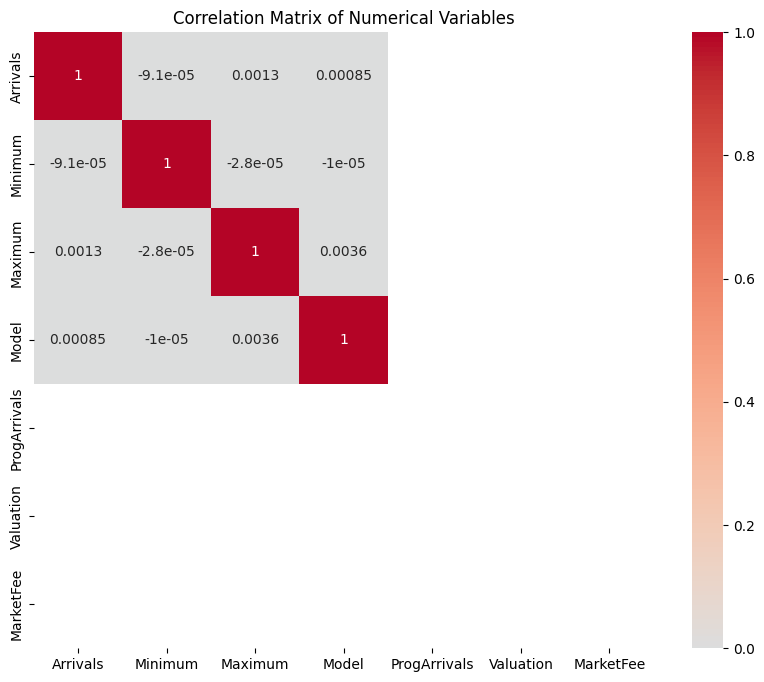

In [15]:
numeric_cols = ['Arrivals', 'Minimum', 'Maximum', 'Model', 'ProgArrivals', 'Valuation', 'MarketFee']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

##  Missing Data Analysis

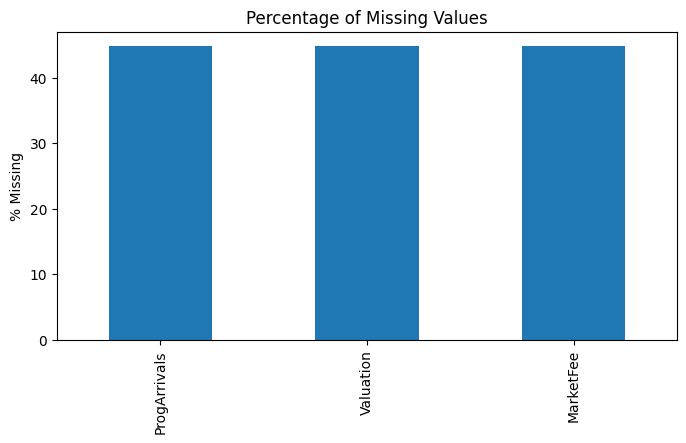

In [24]:
missing_data = df[['ProgArrivals', 'Valuation', 'MarketFee']].isnull().mean() * 100
missing_data.plot(kind='bar', figsize=(8, 4))
plt.title('Percentage of Missing Values')
plt.ylabel('% Missing')
plt.show()

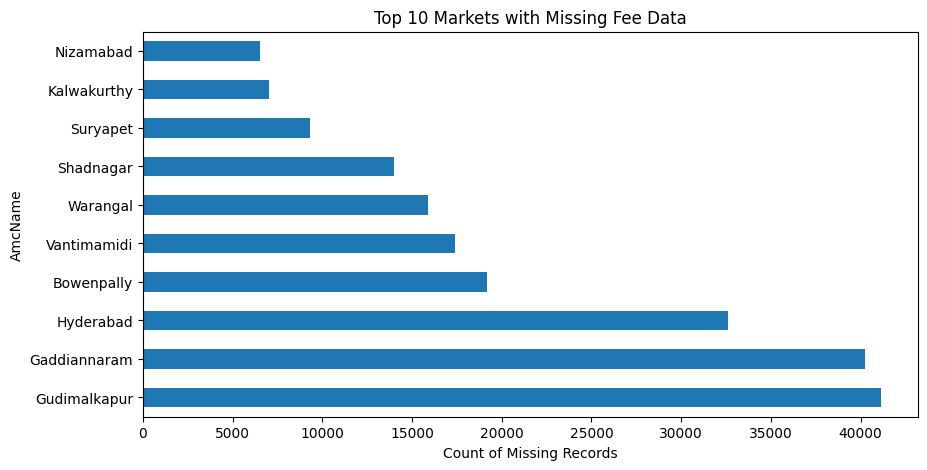

In [8]:
missing_fee_markets = df[df['MarketFee'].isnull()]['AmcName'].value_counts().nlargest(10)
missing_fee_markets.plot(kind='barh', figsize=(10, 5))
plt.title('Top 10 Markets with Missing Fee Data')
plt.xlabel('Count of Missing Records')
plt.show()

## Market Activity Heat Map

Text(0.5, 1.0, 'Market-Commodity Activity Heatmap (Top 10 Commodities)')

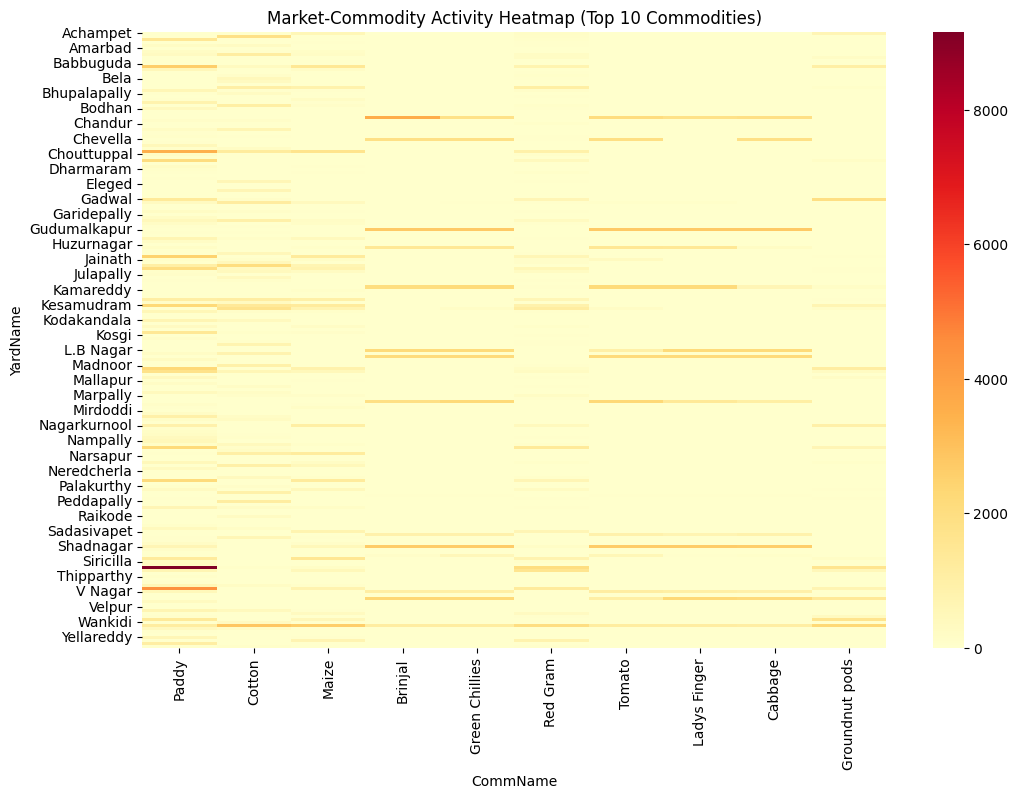

In [9]:
market_comm = pd.crosstab(df['YardName'], df['CommName'])
plt.figure(figsize=(12, 8))
sns.heatmap(market_comm[market_comm.sum().sort_values(ascending=False).head(10).index], 
            cmap='YlOrRd')
plt.title('Market-Commodity Activity Heatmap (Top 10 Commodities)')

## Variety Analysis

Text(0.5, 1.0, 'Top 15 Commodity Varieties')

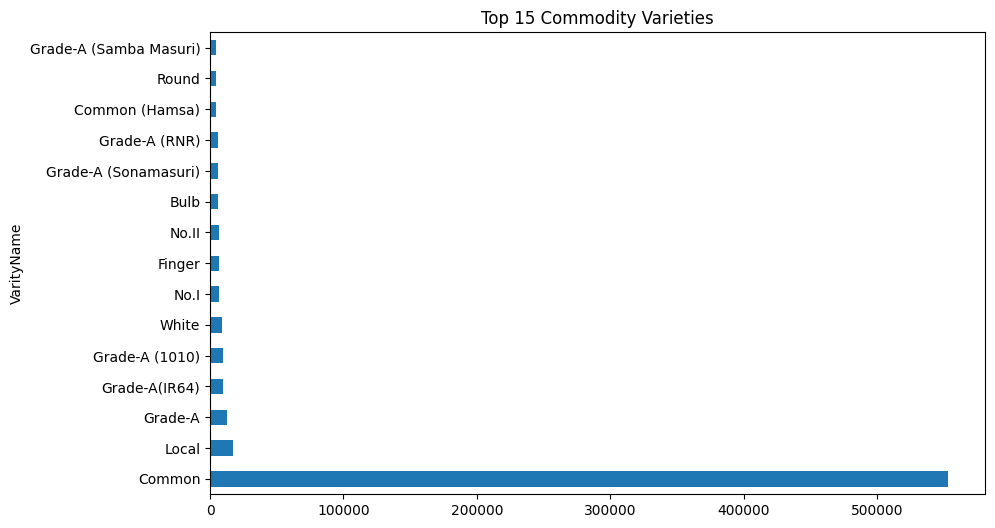

In [10]:
plt.figure(figsize=(10, 6))
df['VarityName'].value_counts().head(15).plot(kind='barh')
plt.title('Top 15 Commodity Varieties')